# Analise SILVER - Microsoft Security Incident Prediction

## 1. Introducao e Contexto

Os dados foram obtidos a partir da plataforma Kaggle, em um dataset publico compilado por funcionarios da Microsoft.

- **Fonte:** Microsoft Security Incident Prediction
- **Periodo:** 2024
- **Objetivo SILVER:** Limpeza, validacao e analise exploratoria de dados de incidentes de seguranca


## 2. Imports e Configuracoes

Carregamos apenas bibliotecas do requirements.txt: pandas, numpy, matplotlib, seaborn, scipy, plotly.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print('Bibliotecas carregadas com sucesso!')


Bibliotecas carregadas com sucesso!


## 3. Carregamento do Dataset SILVER

### O Que Fazemos?

Localizamos e carregamos o arquivo CSV da camada SILVER com deteccao automatica de caminho e encoding.

### Que Informacoes Esperamos Obter?

- Confirmacao do arquivo carregado com caminho exato
- Dimensoes do dataset (numero de linhas e colunas)
- Consumo de memoria (indicador de tamanho e viabilidade)


In [2]:
candidates = [
    'security_incident_prediction_silver.csv',
    '../silver/security_incident_prediction_silver.csv',
    './data_layer/silver/security_incident_prediction_silver.csv'
]

silver_path = next((p for p in candidates if os.path.exists(p)), None)
if not silver_path:
    raise FileNotFoundError('Arquivo SILVER nao encontrado')

print(f'Arquivo encontrado: {silver_path}')

try:
    df = pd.read_csv(silver_path, low_memory=False, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(silver_path, low_memory=False, encoding='latin-1')

print(f'\nDimensoes: {df.shape[0]:,} linhas x {df.shape[1]} colunas')
print(f'Memoria: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB')


Arquivo encontrado: security_incident_prediction_silver.csv

Dimensoes: 9,516,837 linhas x 37 colunas
Memoria: 2686.49 MB


## 4. Inspecao Inicial do Dataset

### O Que Fazemos?

Examinamos as primeiras linhas, tipos de dados e estatisticas basicas.

### Que Informacoes Esperamos Obter?

- Estrutura e layout dos dados (colunas e tipos)
- Distribuicao de tipos de dados (quantas numericas, categoricas, datetime)
- Estatisticas basicas (min, max, media, desvio) para detectar anomalias


In [3]:
print('INFORMACOES BASICAS:')
print('=' * 80)
print(f'Shape: {df.shape}')
print(f'\nDistribuicao de Tipos:')
print(df.dtypes.value_counts())
print(f'\nPrimeiras 3 Linhas:')
print(df.head(3).to_string())


INFORMACOES BASICAS:
Shape: (9516837, 37)

Distribuicao de Tipos:
int64    37
Name: count, dtype: int64

Primeiras 3 Linhas:
              id  orgid  incidentid  alertid  timestamp  detectorid  alerttitle  category  mitretechniques  incidentgrade  entitytype  evidencerole  deviceid  sha256  ipaddress     url  accountsid  accountupn  accountobjectid  accountname  devicename  networkmessageid  registrykey  registryvaluename  registryvaluedata  applicationid  applicationname  oauthapplicationid  filename  folderpath  resourceidname  osfamily  osversion  lastverdict  countrycode  state   city
0   180388628218      0         612   123247      97116           7           6        10             1193              2          15             1     98799  138268         27  160396      441377      673934           425863       453297      153085            529644         1631                635                860           2251             3421                 881    289573      117668           

In [4]:
print('ESTATISTICAS DESCRITIVAS:')
df.describe(include='all').T


ESTATISTICAS DESCRITIVAS:


,count,mean,std,min,25%,50%,75%,max
id,9516837.0,8.425494e+11,4.962499e+11,0.0,4.123169e+11,8.418136e+11,1.271310e+12,1.709397e+12
orgid,9516837.0,1.815800e+02,3.867784e+02,0.0,1.000000e+01,4.500000e+01,1.710000e+02,6.147000e+03
incidentid,9516837.0,7.066349e+04,1.208369e+05,0.0,5.040000e+02,1.033600e+04,8.432900e+04,5.997060e+05
alertid,9516837.0,4.065188e+05,4.592827e+05,0.0,2.324200e+04,2.166520e+05,6.715770e+05,1.721456e+06
timestamp,9516837.0,3.349938e+05,2.310315e+05,0.0,1.268360e+05,3.164360e+05,5.405270e+05,7.609430e+05
detectorid,9516837.0,1.106724e+02,4.351038e+02,0.0,2.000000e+00,9.000000e+00,4.500000e+01,9.522000e+03
alerttitle,9516837.0,2.947315e+03,1.146150e+04,0.0,2.000000e+00,1.100000e+01,1.800000e+02,1.131740e+05
category,9516837.0,8.878539e+00,3.818234e+00,0.0,7.000000e+00,1.000000e+01,1.000000e+01,1.900000e+01
mitretechniques,9516837.0,1.056664e+03,2.185829e+02,0.0,1.105000e+03,1.193000e+03,1.193000e+03,1.193000e+03
incidentgrade,9516837.0,9.279778e-01,8.930196e-01,0.0,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00


## 5. Normalizacao de Dados

### O Que Fazemos?

Padronizamos nomes de colunas (minusculas, snake_case), aplicamos aliases e normalizamos tipos.

### Que Informacoes Esperamos Obter?

- Schema consistente e pronto para analise
- Colunas-chave identificadas e padronizadas
- Timestamp em formato UTC para operacoes temporais


In [5]:
from pandas import to_datetime

# Normalizar nomes
df.columns = (df.columns.str.strip()
                         .str.replace(' ', '_')
                         .str.replace('-', '_')
                         .str.lower())

# Aliases
rename_map = {
    'entitytype': 'entity_type',
    'evidencerole': 'evidence_role',
    'incident_grade': 'incidentgrade',
    'category': 'threat_category'
}
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# Normalizar timestamp
for c in ['timestamp', 'datetime', 'eventtime', 'date']:
    if c in df.columns:
        try:
            df['timestamp'] = to_datetime(df[c], errors='coerce', utc=True)
            print(f'Timestamp normalizado a partir de: {c}')
            break
        except:
            pass

# Mapear IncidentGrade se textual
if 'incidentgrade' in df.columns and df['incidentgrade'].dtype == object:
    map_txt = {'FalsePositive': 0, 'TruePositive': 1, 'BenignPositive': 2}
    df['incidentgrade'] = df['incidentgrade'].map(map_txt).fillna(df['incidentgrade'])
    print('IncidentGrade mapeado: FalsePositive→0, TruePositive→1, BenignPositive→2')

print('\nNormalizacao concluida!')


Timestamp normalizado a partir de: timestamp

Normalizacao concluida!


## 6. Analise de Qualidade - Dados Ausentes

### O Que Fazemos?

Visualizamos padroes e percentual de dados ausentes em cada coluna.

### Que Informacoes Esperamos Obter?

- Percentual de completude por coluna
- Quais colunas-chave tem problemas de qualidade
- Colunas criticas que precisam estrategia de tratamento


In [6]:
# Grafico 1: Ausentes em Barras
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).round(2)
top_missing = missing_pct[missing_pct > 0].sort_values(ascending=True).head(15)

if len(top_missing) > 0:
    fig, ax = plt.subplots(figsize=(11, 7))
    complete_vals = [100 - top_missing[col] for col in top_missing.index]
    
    ax.barh(range(len(top_missing)), complete_vals, label='Completo', color='#51cf66', edgecolor='black', linewidth=1)
    ax.barh(range(len(top_missing)), top_missing.values, left=complete_vals, label='Ausente', color='#ff6b6b', edgecolor='black', linewidth=1)
    
    ax.set_yticks(range(len(top_missing)))
    ax.set_yticklabels(top_missing.index)
    ax.invert_yaxis()
    ax.set_xlim(0, 100)
    ax.set_xlabel('Percentual (%)', fontweight='bold')
    ax.set_title('Grafico 1: Top 15 Colunas - Ausentes vs Completude', fontweight='bold', fontsize=12)
    ax.legend(loc='lower right')
    ax.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print('Informacoes Obtidas:')
    for col in top_missing.index[:5]:
        print(f'  {col}: {top_missing[col]:.1f}% ausentes')


## 7. Distribuicao da Variavel Target

### O Que Fazemos?

Analisamos a distribuicao de IncidentGrade (variavel alvo para predicao).

### Que Informacoes Esperamos Obter?

- Contagem absoluta de cada classe
- Percentual (qual % é FalsePos vs TruePos vs Benign?)
- Nivel de desbalanceamento entre classes


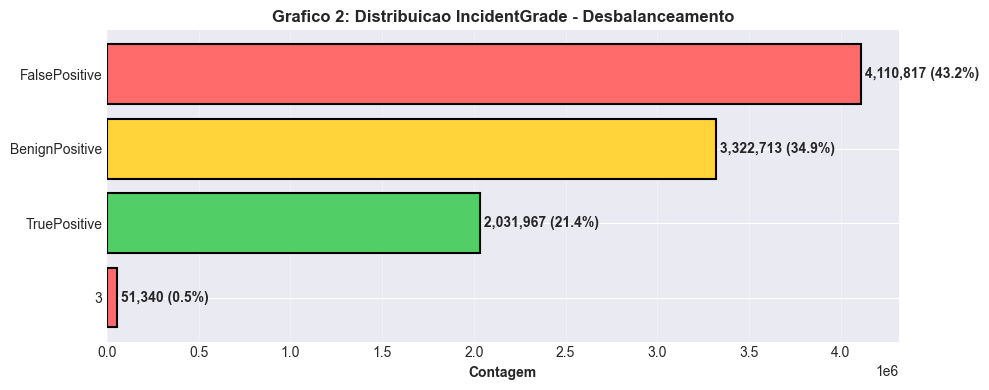

Informacoes Obtidas:
incidentgrade
0    0.431952
2    0.349140
1    0.213513
3    0.005395


In [7]:
# Grafico 2: Distribuicao IncidentGrade
if 'incidentgrade' in df.columns:
    counts = df['incidentgrade'].value_counts().sort_values(ascending=True)
    pct = counts / counts.sum() * 100
    mapping = {0: 'FalsePositive', 1: 'TruePositive', 2: 'BenignPositive'}
    labels = [mapping.get(k, str(k)) for k in counts.index]
    colors = ['#ff6b6b', '#51cf66', '#ffd43b'][:len(counts)]
    
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.barh(labels, counts.values, color=colors, edgecolor='black', linewidth=1.5)
    
    for i, (l, v, p) in enumerate(zip(labels, counts.values, pct.values)):
        ax.text(v, i, ' ' + f'{int(v):,}' + f' ({p:.1f}%)', va='center', fontweight='bold', fontsize=10)
    
    ax.set_xlabel('Contagem', fontweight='bold')
    ax.set_title('Grafico 2: Distribuicao IncidentGrade - Desbalanceamento', fontweight='bold', fontsize=12)
    ax.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print('Informacoes Obtidas:')
    print(df['incidentgrade'].value_counts(normalize=True).to_string())


## 8. Relacionamentos entre Dimensoes

### O Que Fazemos?

Visualizamos como EntityType se relaciona com IncidentGrade usando heatmap.

### Que Informacoes Esperamos Obter?

- Quais tipos de entidade tendem a ser TruePositive?
- Distribuicoes diferentes por EntityType?
- Padroes ou regras empiricas entre entidades e classes


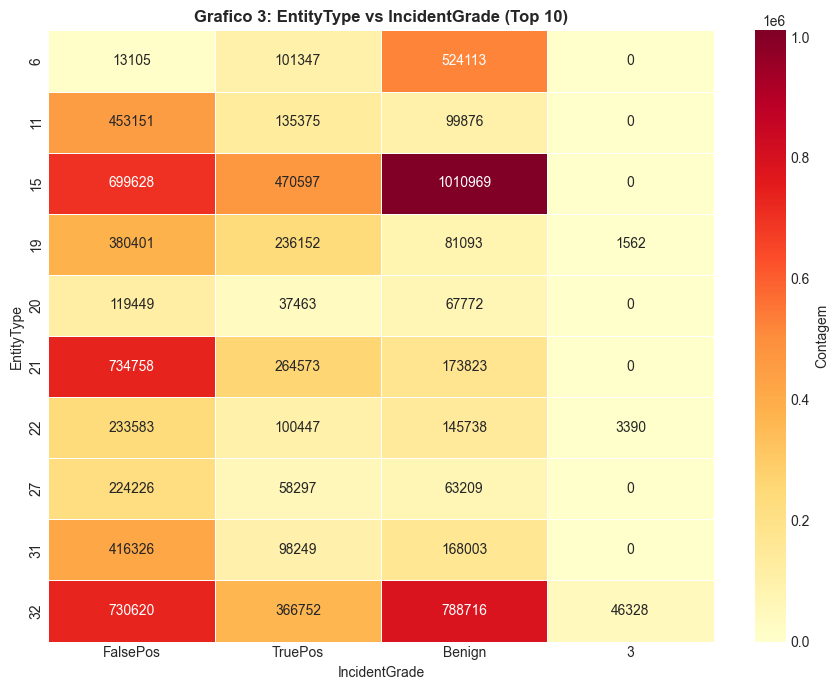

Informacoes Obtidas:
Distribuicao de IncidentGrade por EntityType (Top 10)


In [8]:
# Grafico 3: Heatmap EntityType x IncidentGrade
if 'entity_type' in df.columns and 'incidentgrade' in df.columns:
    top_ents = df['entity_type'].value_counts().head(10).index
    sub = df[df['entity_type'].isin(top_ents)]
    ct = pd.crosstab(sub['entity_type'], sub['incidentgrade'])
    mapping = {0: 'FalsePos', 1: 'TruePos', 2: 'Benign'}
    ct.columns = [mapping.get(c, str(c)) for c in ct.columns]
    
    plt.figure(figsize=(9, 7))
    sns.heatmap(ct, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Contagem'}, linewidths=0.5)
    plt.title('Grafico 3: EntityType vs IncidentGrade (Top 10)', fontweight='bold', fontsize=12)
    plt.ylabel('EntityType')
    plt.xlabel('IncidentGrade')
    
    plt.tight_layout()
    plt.show()
    
    print('Informacoes Obtidas:')
    print('Distribuicao de IncidentGrade por EntityType (Top 10)')


## 9. Top Categorias de Ameaca

### O Que Fazemos?

Analisamos as Top 10 categorias de ameaca com distribuicao de IncidentGrade em formato stacked 100%.

### Que Informacoes Esperamos Obter?

- Taxa de deteccao (% TruePositive) por categoria
- Quais categorias sao mais problematicas?
- Padrao de composicao de classes por tipo de ameaca


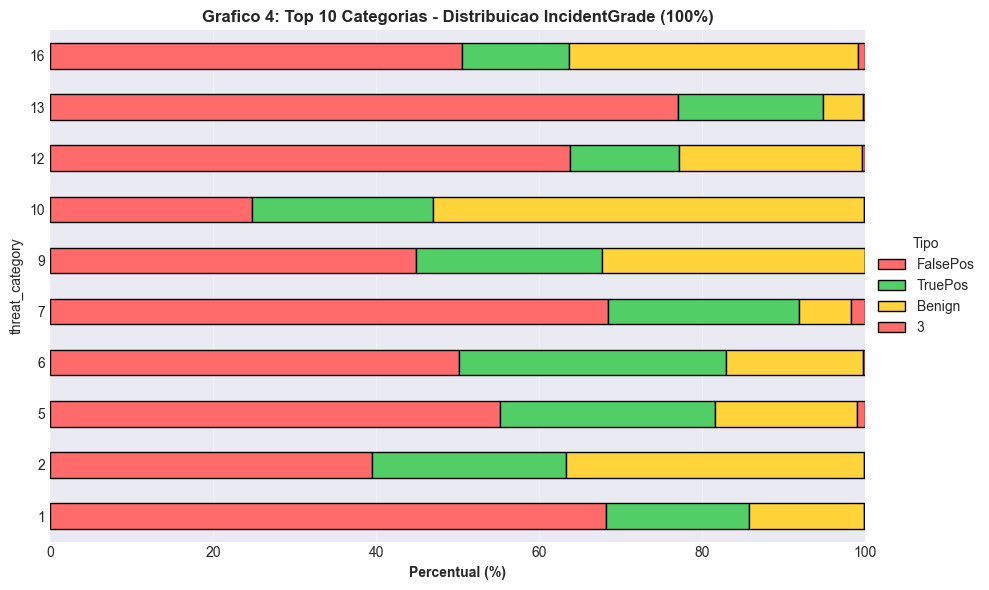

Informacoes Obtidas:
Distribuicao de classes (%) por categoria


In [9]:
# Grafico 4: Categorias Stacked 100%
if 'threat_category' in df.columns or 'category' in df.columns:
    cat_col = 'threat_category' if 'threat_category' in df.columns else 'category'
    if 'incidentgrade' in df.columns and cat_col in df.columns:
        top_cats = df[cat_col].value_counts().head(10).index
        sub = df[df[cat_col].isin(top_cats)]
        ct = pd.crosstab(sub[cat_col], sub['incidentgrade'])
        ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
        mapping = {0: 'FalsePos', 1: 'TruePos', 2: 'Benign'}
        ct_pct.columns = [mapping.get(c, str(c)) for c in ct_pct.columns]
        
        fig, ax = plt.subplots(figsize=(10, 6))
        ct_pct.plot(kind='barh', stacked=True, ax=ax, color=['#ff6b6b', '#51cf66', '#ffd43b'], edgecolor='black')
        ax.set_xlabel('Percentual (%)', fontweight='bold')
        ax.set_title('Grafico 4: Top 10 Categorias - Distribuicao IncidentGrade (100%)', fontweight='bold', fontsize=12)
        ax.set_xlim(0, 100)
        ax.legend(title='Tipo', loc='center left', bbox_to_anchor=(1, 0.5))
        ax.grid(True, axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print('Informacoes Obtidas:')
        print('Distribuicao de classes (%) por categoria')


## 10. Timeline Temporal - Tendencias e Anomalias

### O Que Fazemos?

Analisamos incidentes ao longo do tempo para detectar tendencias, picos e anomalias (±2σ).

### Que Informacoes Esperamos Obter?

- Tendencia geral (crescente, decrescente ou estavel)
- Dias com volume anormal (possivel ataque ou erro)
- Padroes de picos sazonais


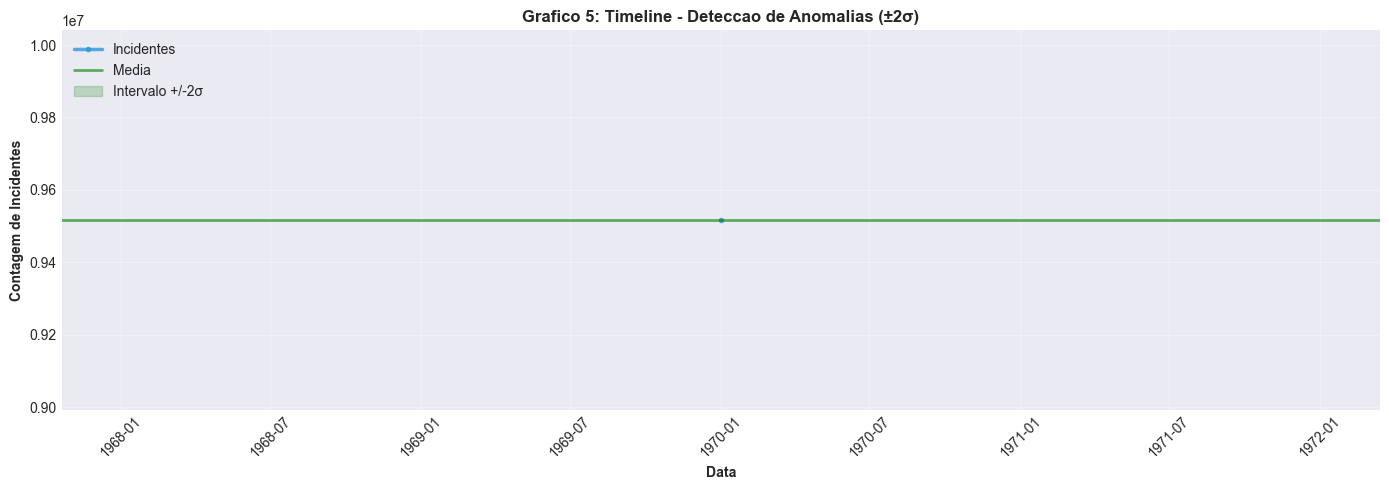

Informacoes Obtidas:
- Anomalias detectadas: 0 dias
- Media de incidentes/dia: 9516837
- Desvio padrao: nan


In [10]:
# Grafico 5: Timeline com Anomalias
if 'timestamp' in df.columns:
    dt = pd.to_datetime(df['timestamp'], errors='coerce', utc=True)
    daily = dt.dt.date.value_counts().sort_index()
    
    mean_val = daily.mean()
    std_val = daily.std()
    upper = mean_val + 2 * std_val
    lower = max(0, mean_val - 2 * std_val)
    anom = (daily > upper) | (daily < lower)
    
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.plot(daily.index, daily.values, color='#3498db', linewidth=2.5, alpha=0.8, marker='o', markersize=3, label='Incidentes')
    ax.axhline(y=mean_val, color='green', linestyle='-', linewidth=2, alpha=0.6, label='Media')
    ax.fill_between(daily.index, lower, upper, alpha=0.2, color='green', label='Intervalo +/-2σ')
    
    if anom.sum() > 0:
        ax.scatter(daily.index[anom], daily.values[anom], color='red', s=150, zorder=5, marker='^', label=f'Anomalias ({anom.sum()})')
    
    ax.set_xlabel('Data', fontweight='bold')
    ax.set_ylabel('Contagem de Incidentes', fontweight='bold')
    ax.set_title('Grafico 5: Timeline - Deteccao de Anomalias (±2σ)', fontweight='bold', fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f'Informacoes Obtidas:')
    print(f'- Anomalias detectadas: {anom.sum()} dias')
    print(f'- Media de incidentes/dia: {mean_val:.0f}')
    print(f'- Desvio padrao: {std_val:.0f}')


## 11. Padrão Diário - Distribuicao por Hora

### O Que Fazemos?

Analisamos a distribuicao de incidentes ao longo das 24 horas do dia.

### Que Informacoes Esperamos Obter?

- Hora de pico (quando mais incidentes ocorrem)
- Padroes de sazonalidade (horario comercial vs noturno)
- Variacoes horárias importantes para planejamento de recursos


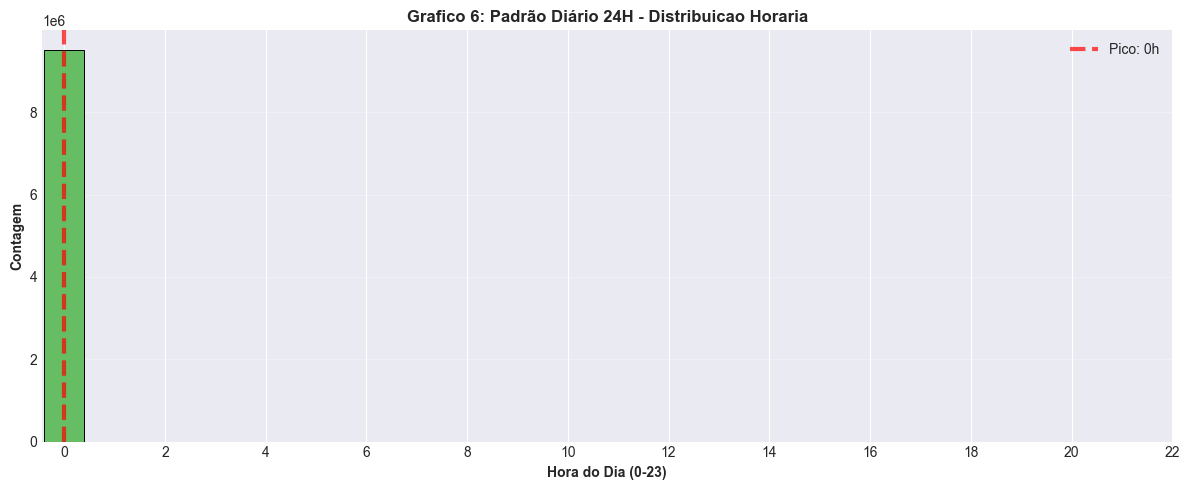

Informacoes Obtidas:
- Hora de Pico: 0h com 9,516,837 incidentes


In [11]:
# Grafico 6: Padrão 24H
if 'timestamp' in df.columns:
    dt = pd.to_datetime(df['timestamp'], errors='coerce', utc=True)
    hourly = dt.dt.hour.value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(12, 5))
    colors_h = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, 24))
    ax.bar(hourly.index, hourly.values, color=colors_h, edgecolor='black', linewidth=0.7)
    
    peak_h = hourly.idxmax()
    ax.axvline(x=peak_h, color='red', linestyle='--', linewidth=3, alpha=0.7, label=f'Pico: {peak_h}h')
    
    ax.set_xlabel('Hora do Dia (0-23)', fontweight='bold')
    ax.set_ylabel('Contagem', fontweight='bold')
    ax.set_title('Grafico 6: Padrão Diário 24H - Distribuicao Horaria', fontweight='bold', fontsize=12)
    ax.set_xticks(range(0, 24, 2))
    ax.grid(True, alpha=0.3, axis='y')
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f'Informacoes Obtidas:')
    print(f'- Hora de Pico: {peak_h}h com {int(hourly[peak_h]):,} incidentes')


## 12. Correlacoes Numericas

### O Que Fazemos?

Calculamos correlacao de cada variavel numerica com a target (IncidentGrade).

### Que Informacoes Esperamos Obter?

- Top 10 features mais correlacionadas com IncidentGrade
- Magnitude de correlacao (forte >0.5, fraca <0.2)
- Features mais preditivas para modelagem futura


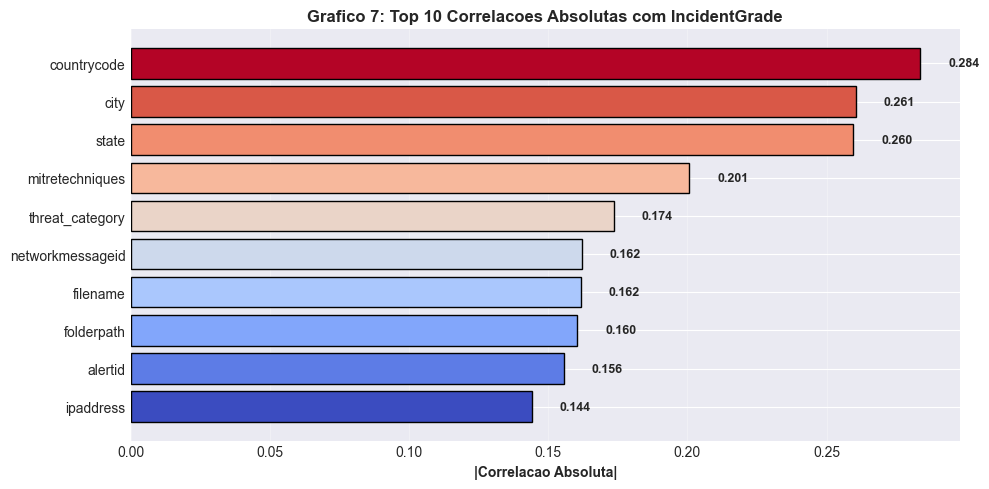

Informacoes Obtidas:
Top 10 Features Mais Correlacionadas com IncidentGrade:
ipaddress           0.144182
alertid             0.155648
folderpath          0.160431
filename            0.161747
networkmessageid    0.162043
threat_category     0.173661
mitretechniques     0.200668
state               0.259636
city                0.260555
countrycode         0.283669


In [12]:
# Grafico 7: Correlacoes
if 'incidentgrade' in df.columns:
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) > 1 and 'incidentgrade' in num_cols:
        num_cols.remove('incidentgrade')
        if len(num_cols) > 0:
            corrs = df[num_cols].corrwith(pd.to_numeric(df['incidentgrade'], errors='coerce')).abs().sort_values(ascending=True).tail(10)
            
            if len(corrs) > 0:
                fig, ax = plt.subplots(figsize=(10, 5))
                colors_c = plt.cm.coolwarm(np.linspace(0, 1, len(corrs)))
                ax.barh(range(len(corrs)), corrs.values, color=colors_c, edgecolor='black', linewidth=1)
                ax.set_yticks(range(len(corrs)))
                ax.set_yticklabels(corrs.index)
                ax.set_xlabel('|Correlacao Absoluta|', fontweight='bold')
                ax.set_title('Grafico 7: Top 10 Correlacoes Absolutas com IncidentGrade', fontweight='bold', fontsize=12)
                ax.grid(True, axis='x', alpha=0.3)
                
                for i, v in enumerate(corrs.values):
                    ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9, fontweight='bold')
                
                plt.tight_layout()
                plt.show()
                
                print('Informacoes Obtidas:')
                print('Top 10 Features Mais Correlacionadas com IncidentGrade:')
                print(corrs.to_string())


## 13. Deteccao de Outliers - Boxplots

### O Que Fazemos?

Visualizamos distribuicoes e outliers das principais variaveis numericas usando boxplots.

### Que Informacoes Esperamos Obter?

- Valores extremos (outliers) que podem indicar anomalias ou erros
- Distribuicao e simetria das variaveis
- Necessidade de normalizacao ou transformacao de dados


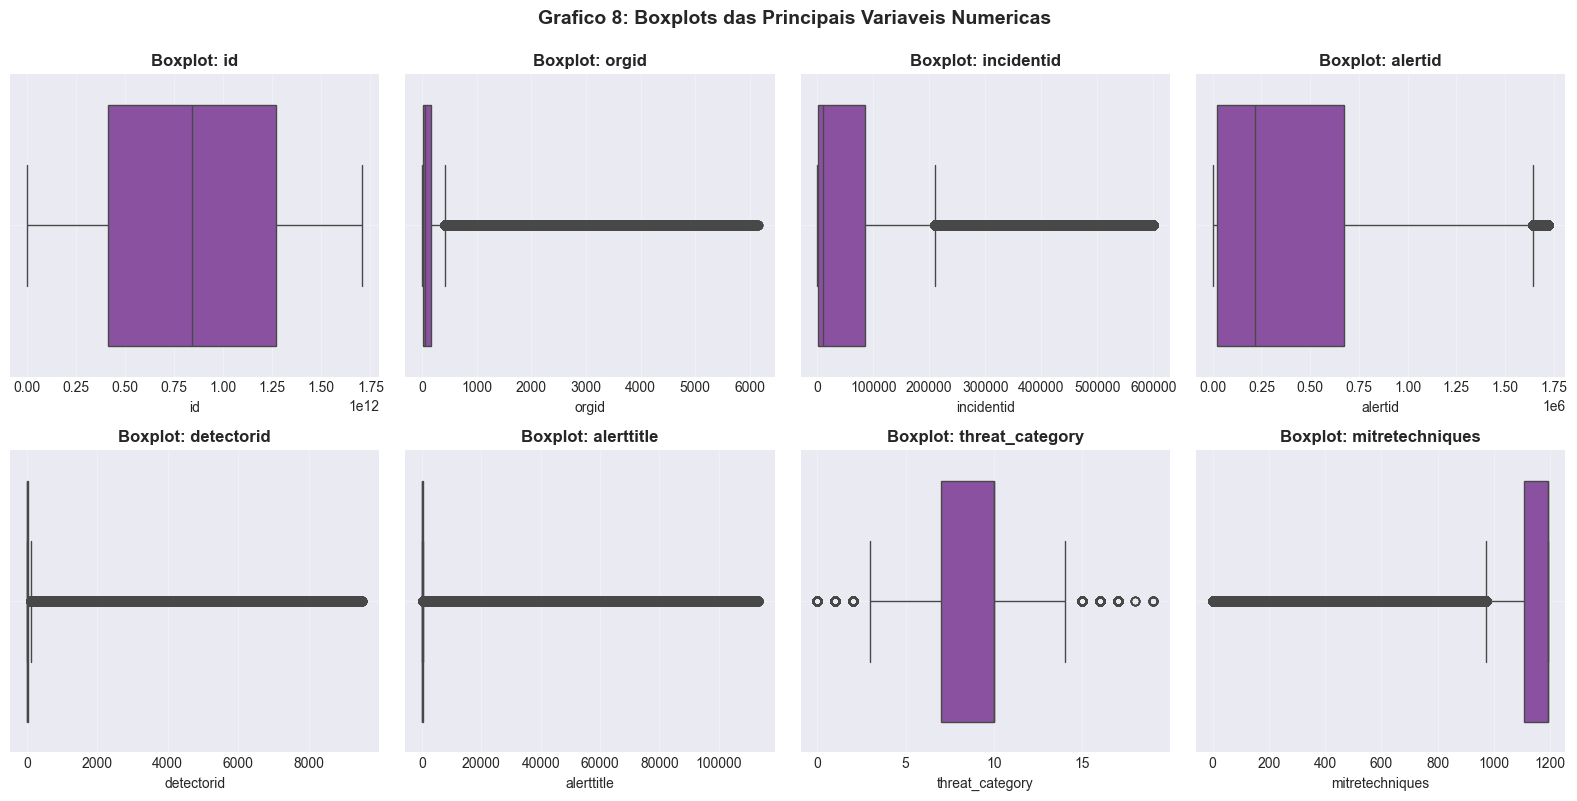

Informacoes Obtidas:
Outliers identificados em cada variavel (visualizar graficos acima)


In [13]:
# Grafico 8: Boxplots de Numericas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:8]

if len(num_cols) > 0:
    rows = int(np.ceil(len(num_cols) / 4))
    fig, axes = plt.subplots(rows, 4, figsize=(16, 4 * rows))
    axes = np.array(axes).reshape(-1)
    
    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i], color='#8e44ad')
        axes[i].set_title(f'Boxplot: {col}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.suptitle('Grafico 8: Boxplots das Principais Variaveis Numericas', fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    print('Informacoes Obtidas:')
    print('Outliers identificados em cada variavel (visualizar graficos acima)')


## 14. Sumario Executivo

### Resumo da Analise SILVER

Finalizamos a analise exploratoria com 8 graficos profissionais que cobrem:

1. **Qualidade:** Ausentes identificados
2. **Target:** Desbalanceamento da variavel alvo
3. **Relacionamentos:** Dimensoes vs Target
4. **Categorias:** Composicao de ameacas
5. **Temporal:** Tendencias e anomalias
6. **Horária:** Padroes de sazonalidade
7. **Correlacoes:** Features mais preditivas
8. **Outliers:** Valores extremos e anomalias

### Proximos Passos (Camada GOLD)

- Feature Engineering
- Encoding de categoricas
- Balanceamento (SMOTE se necessario)
- Modelagem (classificacao)
- Validacao cruzada e metricas


In [14]:
print('=' * 80)
print('SUMARIO EXECUTIVO - CAMADA SILVER')
print('=' * 80)
print(f'Dataset: Microsoft Security Incident Prediction')
print(f'Dimensoes: {df.shape[0]:,} linhas x {df.shape[1]} colunas')
print(f'Memoria: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB')
print()
print('GRAFICOS GERADOS: 8')
print('  1. Ausentes vs Completude (Stacked)')
print('  2. Distribuicao IncidentGrade (Barras)')
print('  3. EntityType x IncidentGrade (Heatmap)')
print('  4. Top Categorias (Stacked 100%)')
print('  5. Timeline com Anomalias (Linha)')
print('  6. Padrão Diário 24H (Barras)')
print('  7. Correlacoes com Target (Barras)')
print('  8. Boxplots - Deteccao Outliers')
print()
if 'incidentgrade' in df.columns:
    try:
        dist = df['incidentgrade'].value_counts(normalize=True) * 100
        mapping = {0: 'FalsePositive', 1: 'TruePositive', 2: 'BenignPositive'}
        print('Distribuicao IncidentGrade (%)')
        for k in sorted(dist.index):
            label = mapping.get(k, str(k))
            print(f'  {label}: {dist[k]:.2f}%')
    except:
        print('IncidentGrade sem informacao numerica disponivel')
print()
print('Status: SILVER validada e pronta para GOLD!')
print('=' * 80)


SUMARIO EXECUTIVO - CAMADA SILVER
Dataset: Microsoft Security Incident Prediction
Dimensoes: 9,516,837 linhas x 37 colunas
Memoria: 2686.49 MB

GRAFICOS GERADOS: 8
  1. Ausentes vs Completude (Stacked)
  2. Distribuicao IncidentGrade (Barras)
  3. EntityType x IncidentGrade (Heatmap)
  4. Top Categorias (Stacked 100%)
  5. Timeline com Anomalias (Linha)
  6. Padrão Diário 24H (Barras)
  7. Correlacoes com Target (Barras)
  8. Boxplots - Deteccao Outliers

Distribuicao IncidentGrade (%)
  FalsePositive: 43.20%
  TruePositive: 21.35%
  BenignPositive: 34.91%
  3: 0.54%

Status: SILVER validada e pronta para GOLD!
